In [7]:
import pandas as pd
import glob
import pyreadstat as py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

In [8]:
#Import
paths = 'FSMS\work_modele\*'
glob.glob(paths)
date = ['29-12-2013','20-01-2016', '03-06-2015','31-05-2015','26-06-2014', '01-07-2013']
data = []
i = 0
for path in glob.glob(paths):
    df,_ = py.read_sav(path, encoding="ISO-8859-1")
    df['date'] = date[i]
    df.date=pd.to_datetime(df.date)
    print(f"import dataframe {i}---> OK")
    data.append(df)
    i +=1
frame = []
for i in range(len(data)):
    mask = (data[i]['Q4_1'] != 0) | (data[i]['Q4_2'] != 0) | (data[i]['Q4_3'] != 0) | (data[i]['Q4_4'] != 0)
    frame.append(data[i][mask])
for i in range(len(frame)):
    frame[i].reset_index(drop=True, inplace=True)
df = pd.concat(frame)

import dataframe 0---> OK
import dataframe 1---> OK
import dataframe 2---> OK
import dataframe 3---> OK
import dataframe 4---> OK
import dataframe 5---> OK


In [9]:
def roc_graph(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def evaluation(model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict_proba(X_train)[:,1]
    y_pred_test = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_train,(y_pred_train), pos_label=1)
    print("AUC on train set : ", auc(fpr, tpr))
    roc_graph(fpr, tpr)
    fpr, tpr, thresholds = roc_curve(y_test,(y_pred_test), pos_label=1)
    print("AUC on test set : ", auc(fpr, tpr))
    roc_graph(fpr, tpr)
    print("*"*50)
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10,))
    plt.figure(figsize=(5,5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')

In [10]:
target =['IA']
Q4 = ["Q4_5_1", "Q4_6_1","Q4_7_1", "Q4_8_1"]
Q2 = [ "Q2_2", "Q2_4", "Q2_6M1", "Q2_6M2", "Q2_6F4", "Q2_6F6"]
Q6 = ["Q6_1A"]
Q7 = ["Q7_0a", "Q7_1"]
Q9 = ["Q9_2","Q9_4","Q9_5","Q9_7", "Q9_12", "Q9_13"]
Q10 = ["Q10_1","Q10_2","Q10_7","Q10_15",]
other = ["Dispo_cer"]
df['IA'] = df['FCS'].apply(lambda x: 1 if x < 42 else 0)
df_selected = df[Q4 + Q2 + Q6 + Q7 + Q9 + Q10 + other + target]
df_selected = df_selected.dropna()
df_selected.shape

(13072, 25)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [12]:
Lore = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
Tree = make_pipeline(DecisionTreeClassifier(random_state=42))
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier())
RandomForest = RandomForestClassifier(random_state=42)
Adaboost = AdaBoostClassifier(random_state=42)

In [16]:

models = {'Lore':Lore, 'Tree':Tree, "KNN": KNN, "RF" : RandomForest, "AB": Adaboost}

In [17]:
X = df_selected.drop('IA', axis=1)
y = df_selected['IA']
ts = 0.25
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=ts,random_state=42,stratify=y)

AUC on train set :  0.7028363193851633


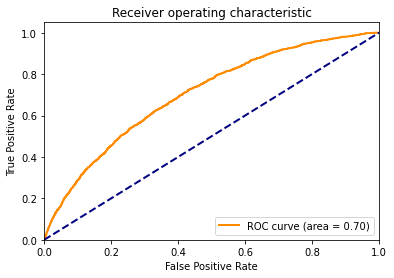

AUC on test set :  0.70986046721448


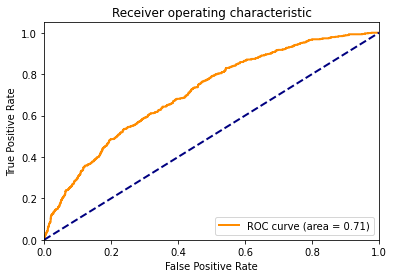

**************************************************
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      2604
           1       0.58      0.03      0.06       664

    accuracy                           0.80      3268
   macro avg       0.69      0.51      0.47      3268
weighted avg       0.76      0.80      0.72      3268



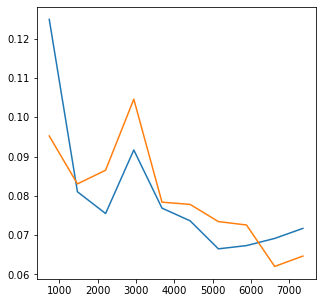

In [40]:
evaluation(Lore)

AUC on train set :  0.998596868581708


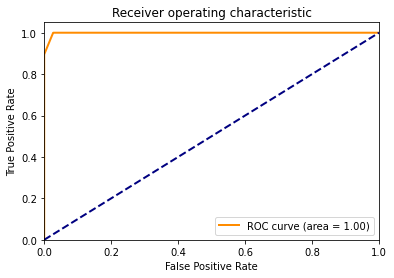

AUC on test set :  0.630728559398886


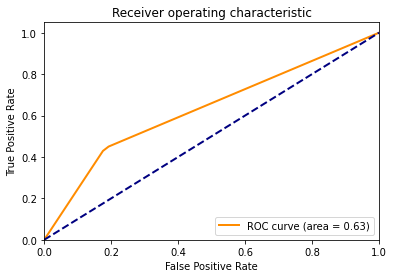

**************************************************
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2604
           1       0.38      0.43      0.41       664

    accuracy                           0.74      3268
   macro avg       0.62      0.63      0.62      3268
weighted avg       0.76      0.74      0.75      3268



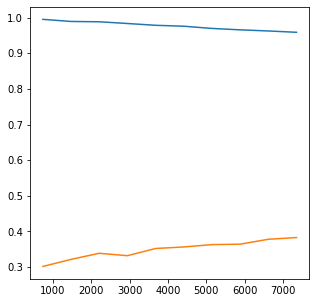

In [41]:
evaluation(Tree)

AUC on train set :  0.9985130391397417


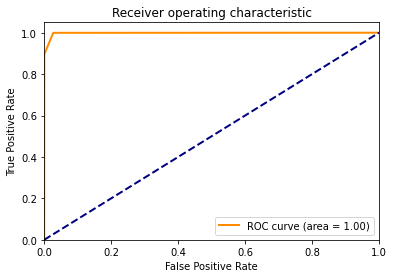

AUC on test set :  0.7608411757629596


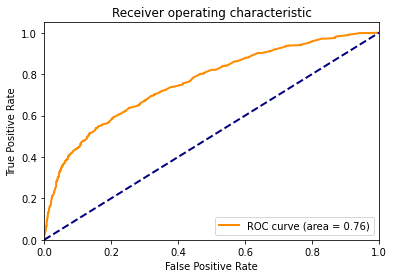

**************************************************
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2604
           1       0.65      0.33      0.43       664

    accuracy                           0.83      3268
   macro avg       0.75      0.64      0.67      3268
weighted avg       0.81      0.83      0.80      3268



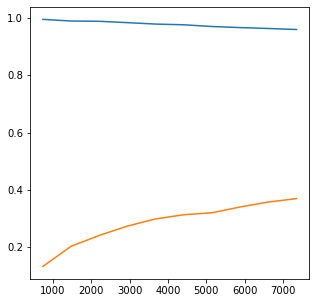

In [42]:
evaluation(RandomForest)

AUC on train set :  0.7195213011254408


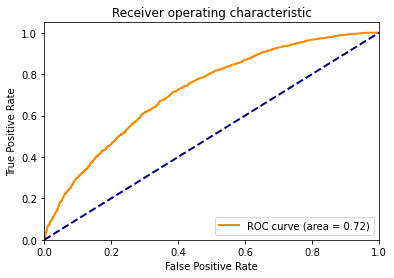

AUC on test set :  0.716527110747136


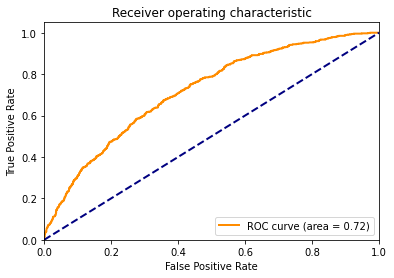

**************************************************
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2604
           1       0.62      0.06      0.11       664

    accuracy                           0.80      3268
   macro avg       0.71      0.53      0.50      3268
weighted avg       0.77      0.80      0.73      3268



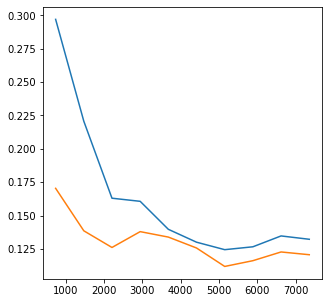

In [43]:
evaluation(Adaboost)

AUC on train set :  0.8706314181314282


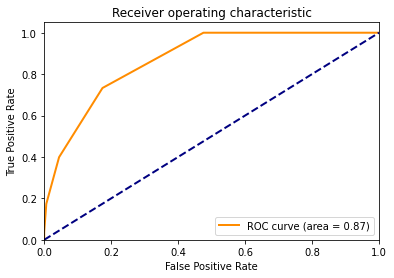

AUC on test set :  0.6840750097162845


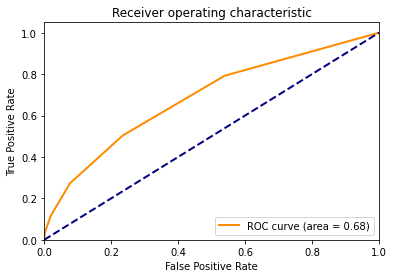

**************************************************
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      2604
           1       0.48      0.27      0.35       664

    accuracy                           0.79      3268
   macro avg       0.65      0.60      0.61      3268
weighted avg       0.76      0.79      0.77      3268



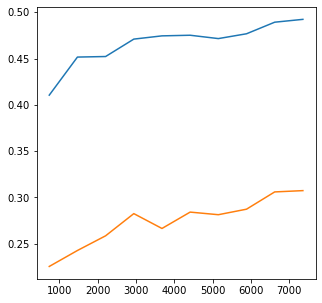

In [44]:
evaluation(KNN)

In [12]:
from sklearn.model_selection import GridSearchCV

In [47]:
params = {'max_depth' : np.arange(2,10,1),
            'min_samples_split' : np.arange(2,10,1),
          'min_samples_leaf': np.arange(2,10,1)             
}
grid_rfc = GridSearchCV(estimator=RandomForest, param_grid= params, cv=5,n_jobs=-1)
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [48]:
y_pred = grid_rfc.predict(X_test)

In [56]:
#evaluation(grid_rfc)

In [51]:
from sklearn.metrics import precision_recall_curve

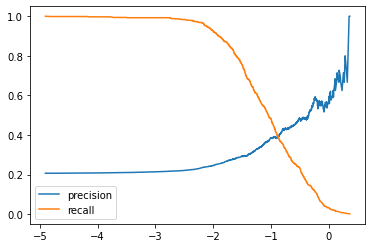

In [59]:
precision, recall, threshold = precision_recall_curve(y_test, Lore.decision_function(X_test))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [51]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [99]:
y_pred = model_final(Lore, X_test, threshold=-1.1)

In [100]:
f1_score(y_test, y_pred)

0.43319097010372176

In [104]:
recall_score(y_test, y_pred)

0.5346385542168675

In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [104]:
xgb = XGBClassifier(max_depth=8,
                    subsample=0.5,
                    min_child_weight=1,
                    gamma=0.01,
                    n_estimators=300,
                    eta=0.01)

In [128]:
parameters = {'max_depth':np.arange(7,8,1),
                'subsample': np.arange(0,0.5,0.1),
                'min_child_weight':np.arange(1,4,1),
                'gamma':np.arange(0,2,0.2),
                'colsample_bytree': np.arange(0.1,1,0.2),
                'n_estimators':[100],
                'eta': [0.01,0.1,0.05]}
xgb = XGBClassifier()
xgb_gcv= GridSearchCV(xgb, parameters, n_jobs=4, cv=5, scoring='roc_auc',
                verbose=1)
xgb_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 2250 candidates, totalling 11250 fits


C:\Users\froge\.conda\envs\analyse\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=4,
             param_grid={'colsample_bytree': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'eta': [0.01, 0.1, 0.

In [129]:
result = xgb_gcv.best_params_

In [130]:
xgb = XGBClassifier(**result)

In [131]:
result

{'colsample_bytree': 0.5000000000000001,
 'eta': 0.05,
 'gamma': 1.0,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.4}

In [132]:
xgb.fit(X_train, y_train, 
            eval_metric='auc', 
            eval_set=[(X_test, y_test),(X_train, y_train)], 
        early_stopping_rounds=50,
            verbose=1)

[0]	validation_0-auc:0.61293	validation_1-auc:0.65124
[1]	validation_0-auc:0.66184	validation_1-auc:0.69078
[2]	validation_0-auc:0.68793	validation_1-auc:0.70725
[3]	validation_0-auc:0.69631	validation_1-auc:0.71854
[4]	validation_0-auc:0.70500	validation_1-auc:0.73004
[5]	validation_0-auc:0.70526	validation_1-auc:0.73832
[6]	validation_0-auc:0.71100	validation_1-auc:0.74349
[7]	validation_0-auc:0.71462	validation_1-auc:0.74559
[8]	validation_0-auc:0.71496	validation_1-auc:0.74940
[9]	validation_0-auc:0.71505	validation_1-auc:0.75433
[10]	validation_0-auc:0.71662	validation_1-auc:0.75620
[11]	validation_0-auc:0.72099	validation_1-auc:0.75928
[12]	validation_0-auc:0.72144	validation_1-auc:0.76153
[13]	validation_0-auc:0.72412	validation_1-auc:0.76303
[14]	validation_0-auc:0.72535	validation_1-auc:0.76640
[15]	validation_0-auc:0.72685	validation_1-auc:0.76811
[16]	validation_0-auc:0.72736	validation_1-auc:0.77019
[17]	validation_0-auc:0.72863	validation_1-auc:0.77248
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5000000000000001, eta=0.05,
              gamma=1.0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.0500000007,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.4, tree_method='exact',
              validate_parameters=1, verbosity=None)